In [132]:
import numpy as np
import h5py
import os
import sys
import scipy
import matplotlib.pyplot as pl

from scipy.interpolate import interp1d

In [121]:
dir_list = os.listdir()

In [122]:
parallel_prof_0604 = h5py.File('parallel-profile-0605.h5', 'r')

In [124]:

for key in parallel_prof_0604.keys():
    print(key)

for key in parallel_prof_0604['First Peak thres = 0.1'].keys():
    print(key)
n_data = np.array(parallel_prof_0604['Max Peak'].get('ref_index'))
z_data = np.array(parallel_prof_0604.get("Z_tx"))

First Peak thres = 0.1
First Peak thres = 0.2
Max Peak
Z_rx
Z_tx
amp_pks
epsilon_r
ref_index
tof_pks


15.0

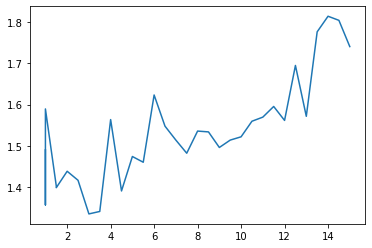

In [125]:
pl.plot(z_data, n_data)
max(z_data)

In [126]:
f_interp = interp1d(z_data, n_data)

In [127]:
z_arr = np.arange(0, 15, 0.05)
n_interp = np.ones(len(z_arr))

In [128]:
for i in range(len(z_arr)):
    if z_arr[i] < 1:
        n_interp[i] = n_data[0]
    elif z_arr[i] > 15:
        n_interp[i] = n_data[-1]
    else:
        n_interp[i] = f_interp(z_arr[i])

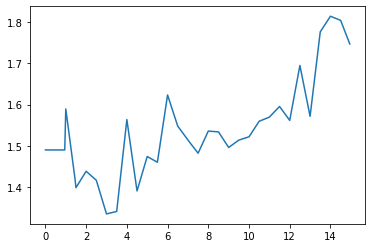

In [129]:
pl.plot(z_arr, n_interp)


In [130]:
parallel_prof_0604.close()
first_prof = open('aletsch_0604_max_peak_15m.txt', 'w')

In [131]:
for i in range(len(n_interp)):
    if i < len(n_interp) - 1:
        line = str(z_arr[i]) + '\t' + str(n_interp[i]) + '\n'
    else:
        line = str(z_arr[i]) + '\t' + str(n_interp[i])
    first_prof.write(line)
first_prof.close()

In [118]:
len(n_interp)

300

In [107]:
15/0.05

300.0